## Draw your sketch!

In [1]:
from ipywidgets import Image
from ipywidgets import ColorPicker, IntSlider, link, AppLayout, HBox
from ipycanvas import RoughCanvas, hold_canvas
import numpy as np
import random
import os
from PIL import Image
import imageio

In [2]:
catemap = {'giraffe':2, 'zebra':3, 'sheep':13}

In [3]:
def postprocess( rgba, background=(255,255,255)):
    row, col, ch = rgba.shape
    assert ch == 4, 'RGBA image has 4 channels.'
    rgb = np.zeros( (row, col, 3), dtype='float32' )
    r, g, b, a = rgba[:,:,0], rgba[:,:,1], rgba[:,:,2], rgba[:,:,3]
    a = np.asarray( a, dtype='float32' ) / 255.0
    R, G, B = background
    rgb[:,:,0] = r * a + (1.0 - a) * R
    rgb[:,:,1] = g * a + (1.0 - a) * G
    rgb[:,:,2] = b * a + (1.0 - a) * B

    arr = np.asarray( rgb, dtype='uint8')
    img = Image.fromarray(np.uint8(arr)).convert('RGB')
    img = img.resize((64,64))
    img = np.concatenate((img, img), axis=1)

    return img

Run this cell then you can draw your sketch

In [4]:
canvas = RoughCanvas(width=512, height=512, sync_image_data=True)

drawing = False
position = None
shape = []


def on_mouse_down(x, y):
    global drawing
    global position
    global shape

    drawing = True
    position = (x, y)
    shape = [position]


def on_mouse_move(x, y):
    global drawing
    global position
    global shape

    if not drawing:
        return

    with hold_canvas(canvas):
        canvas.stroke_line(position[0], position[1], x, y)

        position = (x, y)

    shape.append(position)


def on_mouse_up(x, y):
    global drawing
    global position
    global shape

    drawing = False

    with hold_canvas(canvas):
        canvas.stroke_line(position[0], position[1], x, y)

    shape = []


canvas.on_mouse_down(on_mouse_down)
canvas.on_mouse_move(on_mouse_move)
canvas.on_mouse_up(on_mouse_up)

canvas.stroke_style = "#000000"

HBox((canvas,))

In [5]:
sketch = postprocess(canvas.get_image_data())
category = 'giraffe'    # [sheep, giraffe, zebra]

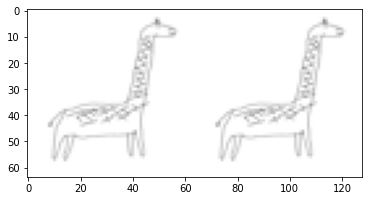

In [6]:
import matplotlib.pyplot as plt

plt.imshow(sketch)

## Generate from SketchyCOCO

In [7]:
path = os.path.join('./example/dataset_example/test',str(catemap[category]))
if not os.path.exists(path):
  os.system('mkdir -p {}'.format(path))
imageio.imwrite(os.path.join(path,str(random.randint(0, 100))+'.png'), sketch)

In [8]:
%run edgegan/test.py --name=edgegan --dataroot=example --dataset=dataset_example --gpu=0

/opt/anaconda3/envs/269tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/anaconda3/envs/269tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/anaconda3/envs/269tf/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/anaconda3/envs/269tf/lib/python3.6/site-packages/tensorflow/python/f

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor







{'?': <absl.app.HelpFlag object at 0x7fba570eea90>,
 'D_norm': <absl.flags._flag.Flag object at 0x7fba5b839048>,
 'E_norm': <absl.flags._flag.Flag object at 0x7fba5b82ef28>,
 'G_norm': <absl.flags._flag.Flag object at 0x7fba5b82ef98>,
 'alsologtostderr': <absl.flags._flag.BooleanFlag object at 0x7fba57476be0>,
 'batch_size': <absl.flags._flag.Flag object at 0x7fba5a103400>,
 'checkpoint_dir': <absl.flags._flag.Flag object at 0x7fba5b82e860>,
 'crop': <absl.flags._flag.BooleanFlag object at 0x7fba5b82e9e8>,
 'dataroot': <absl.flags._flag.Flag object at 0x7fba5b82e940>,
 'dataset': <absl.flags._flag.Flag object at 0x7fba5b82e748>,
 'epoch': <absl.flags._flag.Flag object at 0x7fba5b82e4e0>,
 'gpu': <absl.flags._flag.Flag object at 0x7fba5b82e358>,
 'help': <absl.app.HelpFlag object at 0x7fba570eea90>,
 'helpfull': <absl.app.HelpfullFlag object at 0x7fba5b8392e8>,
 '

W0608 22:41:43.647851 4429284864 deprecation_wrapper.py:119] From /Users/waichung/Desktop/EdgeGAN.nosync/edgegan/test.py:120: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.



W0608 22:41:43.649203 4429284864 deprecation_wrapper.py:119] From /Users/waichung/Desktop/EdgeGAN.nosync/edgegan/test.py:123: The name tf.Session is deprecated. Please use tf.compat.v1.Session instead.



 [*] Init Encoder %s E
 [*] Init Generator %s G1
 [*] Init Generator %s G2



W0608 22:41:43.659240 4429284864 deprecation_wrapper.py:119] From /Users/waichung/Desktop/EdgeGAN.nosync/edgegan/models/edgegan.py:499: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



W0608 22:41:43.670586 4429284864 deprecation_wrapper.py:119] From /Users/waichung/Desktop/EdgeGAN.nosync/edgegan/models/encoder.py:55: The name tf.variable_scope is deprecated. Please use tf.compat.v1.variable_scope instead.



W0608 22:41:43.749338 4429284864 deprecation_wrapper.py:119] From /Users/waichung/Desktop/EdgeGAN.nosync/edgegan/models/encoder.py:68: The name tf.nn.avg_pool is deprecated. Please use tf.nn.avg_pool2d instead.



W0608 22:41:44.088232 4429284864 deprecation_wrapper.py:119] From /Users/waichung/Desktop/EdgeGAN.nosync/edgegan/models/edgegan.py:547: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.



---------
Variables: name (type shape) [size]
---------
E/e_resnet_64_0/conv2d/w:0 (float32_ref 4x4x3x64) [3072, bytes: 12288]
E/e_resnet_64_0/conv2d/b:0 (float32_ref 64) [64, bytes: 256]
E/e_resnet_128_1/res1/conv2d/w:0 (float32_ref 3x3x64x128) [73728, bytes: 294912]
E/e_resnet_128_1/res1/conv2d/b:0 (float32_ref 128) [128, bytes: 512]
E/e_resnet_128_1/res2/conv2d/w:0 (float32_ref 3x3x128x128) [147456, bytes: 589824]
E/e_resnet_128_1/res2/conv2d/b:0 (float32_ref 128) [128, bytes: 512]
E/e_resnet_128_1/shortcut/conv2d/w:0 (float32_ref 1x1x64x128) [8192, bytes: 32768]
E/e_resnet_128_1/shortcut/conv2d/b:0 (float32_ref 128) [128, bytes: 512]
E/e_resnet_256_2/res1/conv2d/w:0 (float32_ref 3x3x128x256) [294912, bytes: 1179648]
E/e_resnet_256_2/res1/conv2d/b:0 (float32_ref 256) [256, bytes: 1024]
E/e_resnet_256_2/res2/conv2d/w:0 (float32_ref 3x3x256x256) [589824, bytes: 2359296]
E/e_resnet_256_2/res2/conv2d/b:0 (float32_ref 256) [256, bytes: 1024]
E/e_resnet_256_2/shortcut/conv2d/w:0 (float32_

W0608 22:41:44.361255 4429284864 deprecation.py:323] From /opt/anaconda3/envs/269tf/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


INFO:tensorflow:Restoring parameters from outputs/edgegan/checkpoints/DCGAN.model-28002


I0608 22:41:44.364164 4429284864 saver.py:1280] Restoring parameters from outputs/edgegan/checkpoints/DCGAN.model-28002


 [*] Success to read DCGAN.model-28002
 [*] Load SUCCESS
Test: [   0/   5]
Test: [   1/   5]
Test: [   2/   5]
Test: [   3/   5]
Test: [   4/   5]
